Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
data  = pd.read_csv('Dataset/Mall_Customers.csv')

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = data.iloc[:, [3,4]].values      # selecting annual income(col 3) and spending score(col 4)

Using Elbow method to find the number of cluster

Elbow method helps to choose the optimal number of cluster, runs the clustering algo on different number of clusters too determine the optimal number of clusters

[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156588, 21862.092672182887, 19672.07284901432]


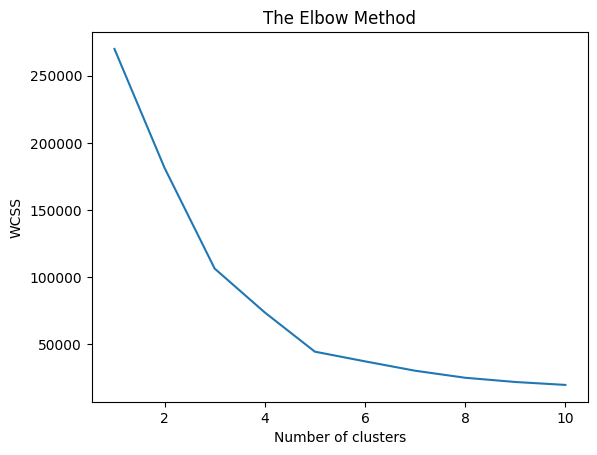

In [10]:
from sklearn.cluster import KMeans

wcss = []   #Within cluster sum of squares

for i in range(1, 11):
    #10 different KMeans objects are created, to identify clusters ranging from 1- 10
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)  
    #random_state is any random number,  42 considered as a lucky no.
    #Kmeans++ used to avoid choosing the centroids randomly, because choosing random centroids can result in wrong clusters,
    #which in turn saves us from falling into the random initialization trap
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)        #attribute .inertia_ gives us the wcss value

print(wcss)

#Plotting the results obtained from plotting the wcss values stored in wcss list
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(range(1,11),wcss)
plt.show()

Training K-means classifier to identify 5 clusters(no. of clusters obtained from above curve)

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)       #values 0 - 3 will denote each of the clusters

KMeans(n_clusters=5, random_state=42)

In [7]:
y_kmeans = kmeans.fit_predict(X)

In [8]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


Visualising the clusters

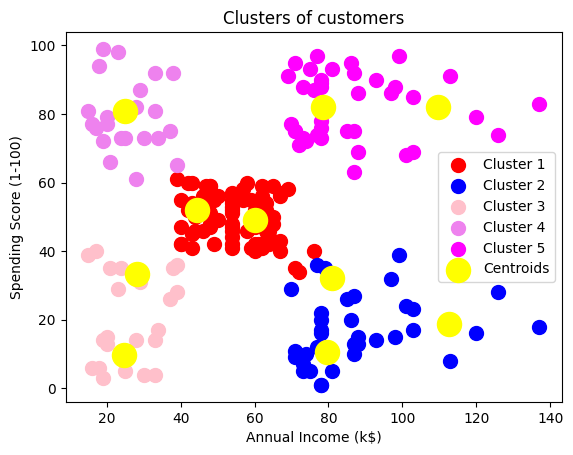

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'pink', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'violet', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()